<a href="https://colab.research.google.com/github/XuekaiQian/RA2-Atividade1/blob/main/Atividade_Pr%C3%A1tica_Em_Grupo_RA3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Alunos:** 
**Xuekai Qian, Raphael de Oliveira, Rafael Leal, Marcelo Wzorek**

# Questão 1
1. **Análise de Sinais Sonoros**

   Um microfone registra um sinal sonoro cuja intensidade $I(t)$ varia com o tempo de acordo com a função $I(t) = 20\sin(t) + 50$. O tempo $t$ está em segundos. Determine a intensidade sonora total registrada pelo microfone em um intervalo de 10 segundos.

2. **Aceleração de uma Nave Espacial**

   Uma nave espacial está acelerando de acordo com a seguinte função de aceleração: $a(t) = 10\cos(t) + 30$ m/s², onde $t$ é o tempo em segundos. Determine a mudança total na velocidade da nave nos primeiros 5 segundos.

3. **Cálculo do Consumo de Energia**

   Um servidor de um data center consome energia de acordo com a função $E(t) = 200 + 100\sin(t)$, onde $E$ é a energia em watts e $t$ é o tempo em horas. Calcule o total de energia consumida pelo servidor em 24 horas.

4. **Volume de Líquido em um Reservatório**

   A taxa de fluxo de água entrando em um reservatório em litros por segundo é dada pela função $f(t) = 100 + 20\sin(t)$, onde $t$ é o tempo em segundos. Calcule o total de água que entrou no reservatório nos primeiros 60 segundos.


## Soluções

In [2]:
import math

def intensity(t):
    return 20 * math.sin(t) + 50

def total_intensity(start_time, end_time):
    integral = 0
    step = 0.000001  
 
    t = start_time
    while t <= end_time:
        integral += (intensity(t) + intensity(t + step)) * step / 2
        t += step

    return integral


start_time = 0
end_time = 10

total = total_intensity(start_time, end_time)
print("Intensidade sonora total:", total)


Intensidade sonora total: 536.7814697216488


In [3]:
import math
def a(t):
  return 10 * math.cos(t) + 30 
def mudanca(start_time, end_time):
  start = 0
  step = 0.000001

  t = start_time
  while t <= end_time:
    start += (a(t) + a(t+step)) * step / 2
    t += step
  return start
start_time = 0
end_time = 5
mudanca = mudanca(start_time, end_time)
print("A mudança total de primeiros 5 segundos é: ", mudanca, "m/s²")

A mudança total de primeiros 5 segundos é:  140.41075725696464 m/s²


In [1]:
import math

def consumo_energia_total():
    t_inicial = 0
    t_final = 24
    def E(t):
        return 200 + 100 * math.sin(t)
    integral = 0
    n = 1000
    delta_t = (t_final - t_inicial) / n
    for i in range(n):
        t = t_inicial + i * delta_t
        integral += E(t) * delta_t
    return integral
print(f"O total de energia consumida pelo servidor em 24 horas é aproximadamente: {consumo_energia_total():.2f} watts")

O total de energia consumida pelo servidor em 24 horas é aproximadamente: 4858.67 watts


In [4]:
import math
def volume_agua_reservatorio():
    t_inicial = 0
    t_final = 60
    def f(t):
        return 100 + 20 * math.sin(t)
    integral = 0
    n = 1000
    delta_t = (t_final - t_inicial) / n
    for i in range(n):
        t = t_inicial + i * delta_t
        integral += f(t) * delta_t
    return integral
print(f"O total de água que entrou no reservatório nos primeiros 60 segundos é aproximadamente: {volume_agua_reservatorio():.2f} litros")

O total de água que entrou no reservatório nos primeiros 60 segundos é aproximadamente: 6039.22 litros


# Questão 2
Um veículo autônomo está sendo testado em um circuito fechado. Durante o teste, o veículo registra a sua velocidade em cinco momentos distintos, conforme apresentado na tabela abaixo:

| Tempo (s) | Velocidade (m/s) |
|-----------|------------------|
| 0         | 0                |
| 1         | 3                |
| 2         | 4                |
| 3         | 2                |
| 4         | 0                |

Suponha que a função de velocidade $v(t)$ do veículo possa ser representada por um polinômio $P(t)$ que passa por todos os cinco pontos. O método de Lagrange é uma técnica para encontrar esse polinômio, e pode ser aplicado utilizando a biblioteca `scipy` do Python. Trace os gráficos da velocidade, aceleração e posição em relação ao tempo e marque estes três valores com uma linha vertical em $t=5$s.

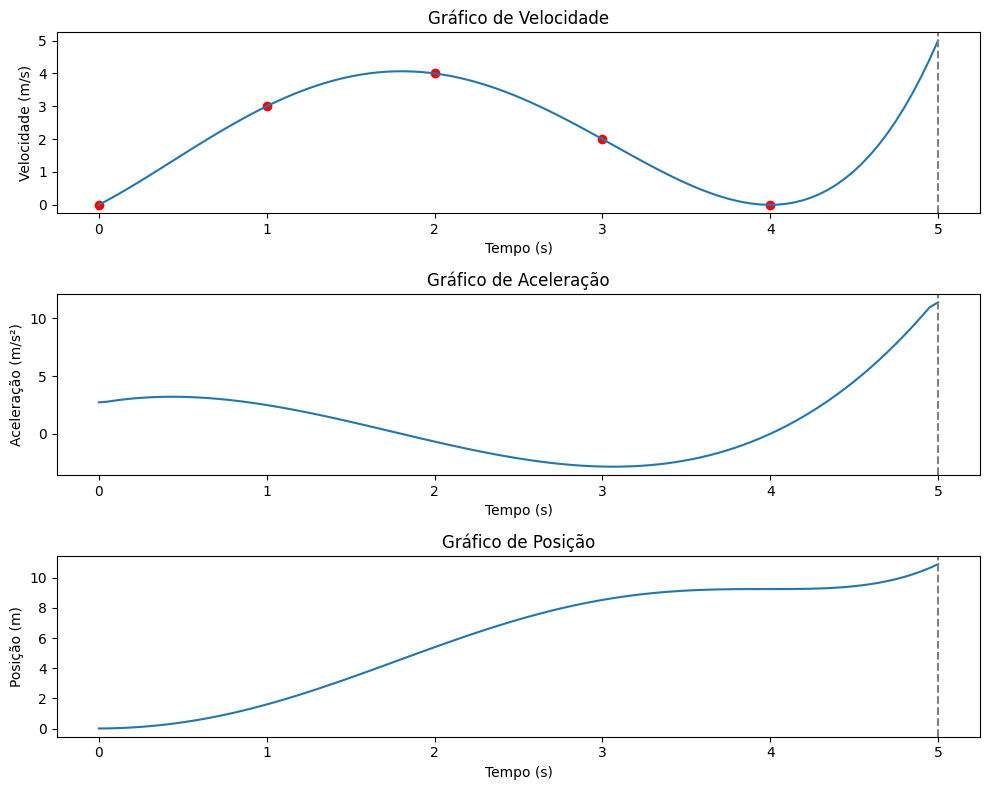

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

tempo = [0, 1, 2, 3, 4]
velocidade = [0, 3, 4, 2, 0]
polinomio = lagrange(tempo, velocidade)
t = np.linspace(0, 5, 100)
velocidade_interpolada = polinomio(t)
aceleracao_interpolada = np.gradient(velocidade_interpolada, t)
posicao_interpolada = np.cumsum(velocidade_interpolada) * (t[1] - t[0])
plt.figure(figsize=(10, 8))

plt.subplot(3, 1, 1)
plt.plot(t, velocidade_interpolada)
plt.scatter(tempo, velocidade, color='red')
plt.axvline(x=5, color='gray', linestyle='--')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade (m/s)')
plt.title('Gráfico de Velocidade')

plt.subplot(3, 1, 2)
plt.plot(t, aceleracao_interpolada)
plt.axvline(x=5, color='gray', linestyle='--')
plt.xlabel('Tempo (s)')
plt.ylabel('Aceleração (m/s²)')
plt.title('Gráfico de Aceleração')

plt.subplot(3, 1, 3)
plt.plot(t, posicao_interpolada)
plt.axvline(x=5, color='gray', linestyle='--')
plt.xlabel('Tempo (s)')
plt.ylabel('Posição (m)')
plt.title('Gráfico de Posição')
plt.tight_layout()
plt.show()

Um engenheiro está projetando uma barragem de concreto com a forma de um trapézio retângulo. O projeto do perfil da barragem, olhando de lado, é dado pela função $f(x) = a + b\sin\left(\frac{\pi x}{H}\right)$, onde $x$ é a altura acima da base (em metros), $a$ é a altura mínima da barragem (em metros), e $b$ é a amplitude da variação do perfil (em metros). Por razões de segurança, o perfil da barragem varia sinusoidalmente de $a$ até $a + b$ ao longo da altura.

O engenheiro precisa calcular o volume de concreto necessário para construir a barragem. Ele sabe que o comprimento da barragem é de $L$ metros e que o perfil é o mesmo em todo o seu comprimento.

Ele decide então modelar o volume de concreto necessário como a integral da função $f(x)$, de $0$ até a altura máxima $H$, multiplicada pelo comprimento $L$.

Dadas as seguintes informações:

- $a = 10$ metros
- $b = 5$ metros
- $H = 20$ metros
- $L = 100$ metros

Calcule o volume de concreto necessário para a construção da barragem e trace o gráfico da função que descreve o perfil da barragem e sombreie a área sob a curva que representa o volume de concreto.



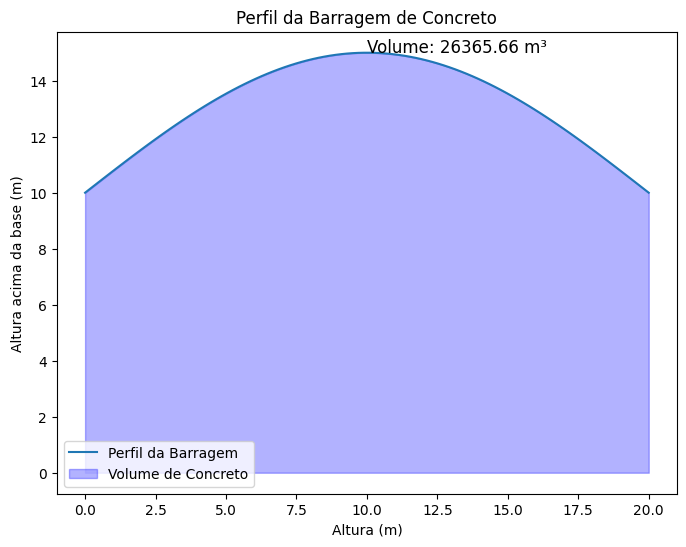

In [6]:
import numpy as np
import matplotlib.pyplot as plt

a = 10
b = 5
H = 20
L = 100

x = np.linspace(0, H, 100)
f_x = a + b * np.sin(np.pi * x / H)
volume = np.trapz(f_x, x) * L

plt.figure(figsize=(8, 6))
plt.plot(x, f_x, label='Perfil da Barragem')
plt.fill_between(x, 0, f_x, alpha=0.3, color='blue', label='Volume de Concreto')
plt.xlabel('Altura (m)')
plt.ylabel('Altura acima da base (m)')
plt.title('Perfil da Barragem de Concreto')
plt.legend()
plt.text(10, 15, f'Volume: {volume:.2f} m³', fontsize=12)
plt.show()